## Postprocessing - Reject Option Classification - Adult Model
- for 'sex' and 'race'

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.insert(0, project_root)

import pandas as pd
from src.data_loading import load_adult_sex, load_adult_race
from src.modeling import reject_option_classification_train_and_predict
from src.metrics import compute_metrics, compare_viz_metrics_2x3, save_agg_metrics, save_raw_metrics
from sklearn.model_selection import StratifiedShuffleSplit

%matplotlib inline
import matplotlib
matplotlib.use('module://matplotlib_inline.backend_inline')


/opt/anaconda3/lib/python3.11/site-packages/inFairness/utils/ndcg.py:37: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  vect_normalized_discounted_cumulative_gain = vmap(
/opt/anaconda3/lib/python3.11/site-packages/inFairness/utils/ndcg.py:48: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  monte_carlo_vect_ndcg = vmap(vect_normalized_di

In [2]:
dataset_name = 'adult'
mitigation_name   = 'reject option classification'
pipeline_stage    = 'postprocessing'  
out_dir_plots    = '../../reports/plots_adult'

In [3]:
baseline_race_agg = pd.read_csv('../../reports/baseline_agg/adult_race_metrics_agg.csv', index_col=0)
baseline_sex_agg = pd.read_csv('../../reports/baseline_agg/adult_sex_metrics_agg.csv', index_col=0)

--------------------------------------------------------------------------------------------------------------------------------------

## default Reject Option Classification, sex

In [4]:
# 1) Load data
protected          = 'sex'
privileged_value   = 1.0
unprivileged_value = 0.0

ds, df = load_adult_sex()  
feature_cols = [c for c in df.columns if c not in ('label', protected)]

# 2) Run experiment and evaluate
sss = StratifiedShuffleSplit(n_splits=25, test_size=0.2, random_state=42)

results = []
for train_idx, test_idx in sss.split(df, df['label']):
    test_df, y_test, y_pred_post = reject_option_classification_train_and_predict(
        df,
        train_idx,
        test_idx,
        feature_cols,
        protected,
        privileged_value,
        unprivileged_value
    )

    m = compute_metrics(
        test_df, y_test, y_pred_post,
        protected, privileged_value, unprivileged_value
    )
    results.append(m)

# 3) Aggregate results
adult_sex_metrics     = pd.DataFrame(results)
adult_sex_metrics_agg = adult_sex_metrics.agg(['mean', 'std'])
print(adult_sex_metrics_agg)

      accuracy  f1_score       SPD        DI       EOD       AOD
mean  0.784658  0.636955 -0.043159  0.882468  0.160710  0.106829
std   0.011885  0.007262  0.009895  0.026787  0.019467  0.009422


/var/folders/pr/f4jl4tln3yn9fd_1yjrwwkp40000gn/T/ipykernel_1852/366461395.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


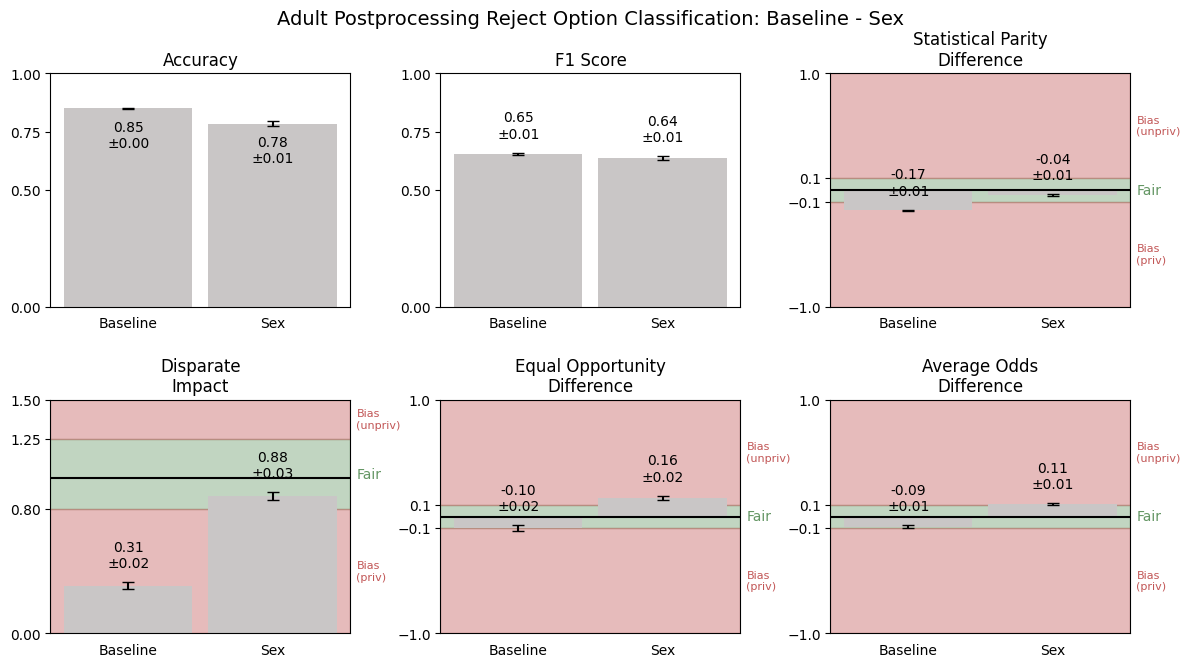

In [5]:
plot_title = 'Adult Postprocessing Reject Option Classification: Baseline - Sex'
fig = compare_viz_metrics_2x3(baseline_sex_agg, adult_sex_metrics_agg, 'Baseline', 'Sex', plot_title)
fname    = plot_title.replace(' ', '_').replace('(', '').replace(')', '')
out_path = os.path.join(out_dir_plots, f'{fname}.png')
fig.savefig(out_path)
fig.show()

## default  Reject Option Classification, race

In [6]:
# 1) Load data
protected          = 'race'
privileged_value   = 1.0
unprivileged_value = 0.0

ds, df = load_adult_race()  
feature_cols = [c for c in df.columns if c not in ('label', protected)]

# 2) Run experiment and evaluate
sss = StratifiedShuffleSplit(n_splits=25, test_size=0.2, random_state=42)

results = []
for train_idx, test_idx in sss.split(df, df['label']):
    test_df, y_test, y_pred_post = reject_option_classification_train_and_predict(
        df,
        train_idx,
        test_idx,
        feature_cols,
        protected,
        privileged_value,
        unprivileged_value
    )

    m = compute_metrics(
        test_df, y_test, y_pred_post,
        protected, privileged_value, unprivileged_value
    )
    results.append(m)

# 3) Aggregate results
adult_race_metrics     = pd.DataFrame(results)
adult_race_metrics_agg = adult_race_metrics.agg(['mean', 'std'])
print(adult_race_metrics_agg)

      accuracy  f1_score       SPD        DI       EOD       AOD
mean  0.795746  0.666406 -0.045593  0.879665  0.070399  0.039139
std   0.006708  0.006408  0.012405  0.033079  0.020749  0.013287


/var/folders/pr/f4jl4tln3yn9fd_1yjrwwkp40000gn/T/ipykernel_1852/321693910.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


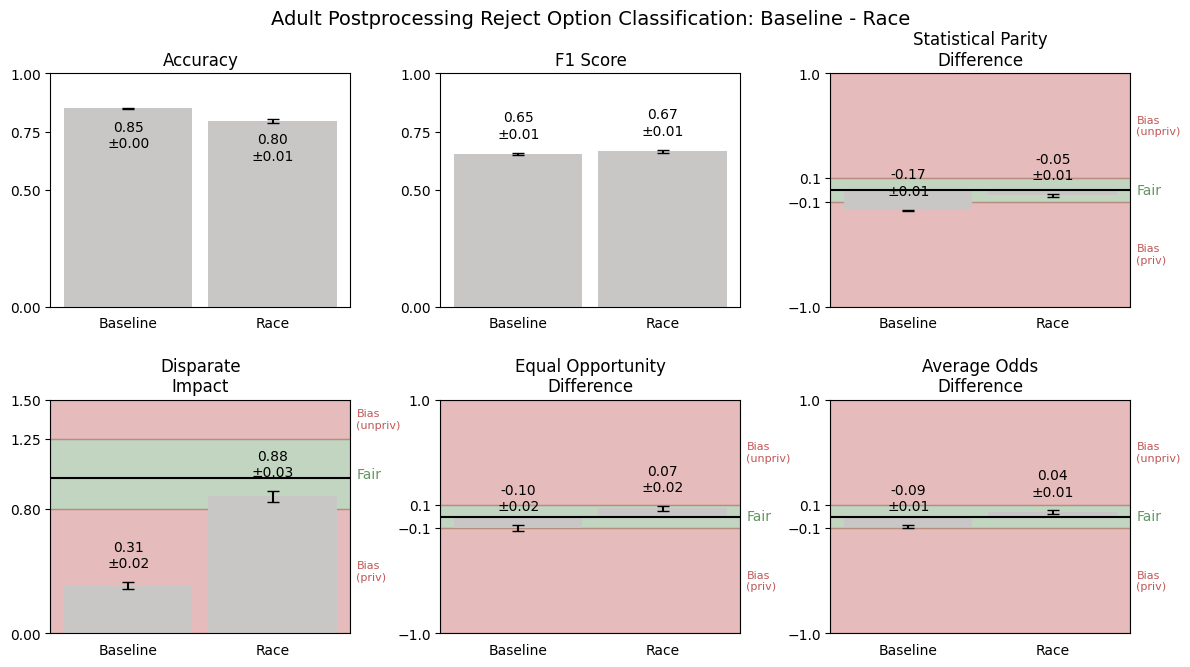

In [7]:
plot_title = 'Adult Postprocessing Reject Option Classification: Baseline - Race'
fig = compare_viz_metrics_2x3(baseline_sex_agg, adult_race_metrics_agg, 'Baseline', 'Race', plot_title)
fname    = plot_title.replace(' ', '_').replace('(', '').replace(')', '')
out_path = os.path.join(out_dir_plots, f'{fname}.png')
fig.savefig(out_path)
fig.show()

# -------------

In [8]:
# 1) Save the aggregated metrics 
save_agg_metrics(
    dataset_name      = dataset_name,
    mitigation_name   = mitigation_name,
    race_agg_df       = adult_race_metrics_agg,
    sex_agg_df        = adult_sex_metrics_agg,
    pipeline_stage    = pipeline_stage   
)

# 2) Save the raw metrics
save_raw_metrics(
    dataset_name      = dataset_name,
    mitigation_name   = mitigation_name,
    race_raw_df       = adult_race_metrics,
    sex_raw_df        = adult_sex_metrics,
    pipeline_stage    = pipeline_stage
)